<a href="https://colab.research.google.com/github/anishrashinkar-26/BML/blob/main/LCA_BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering Accuracy: 0.83


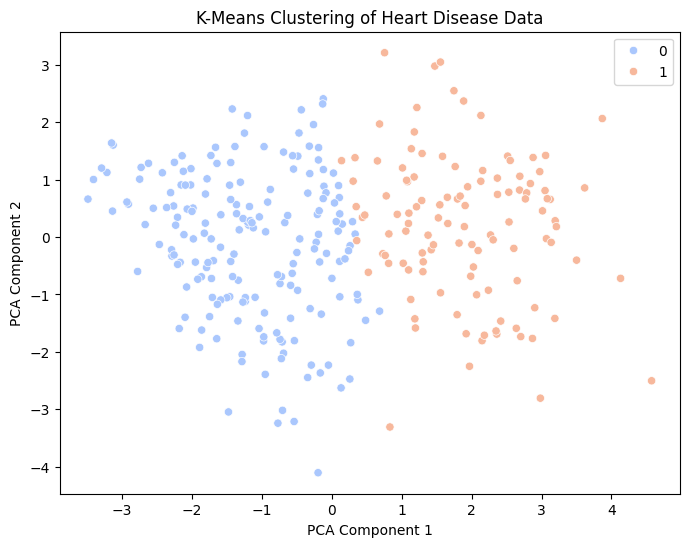

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=columns)

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
y_pred = kmeans.labels_

acc1 = accuracy_score(y, y_pred)
acc2 = accuracy_score(y, 1 - y_pred)
accuracy = max(acc1, acc2)
print(f"K-Means Clustering Accuracy: {accuracy:.2f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette='coolwarm')
plt.title("K-Means Clustering of Heart Disease Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
